<div class="alert alert-block alert-info" style="background-color: #323031; color:#ffffff; width:90%; padding:50px; -webkit-border-radius:5px">

# Python Data Visualization 3 - Seaborn and pandas plots

The Python Data Visualization series teaches you how to use the most popular libraries to generate visualizations in Python. After having completed this series, you will be able to create and customize line, scatter, bar plots and histograms with matplotlib. You will also learn how to create visualizations with pandas and seaborn. Matplotlib is the original library written in Python for data visualization and seaborn and pandas plotting capabilities depend on matplotlib. While matplotlib is very powerful, it often requires more code to create visually pleasing and effective plots compared to seaborn or pandas.

This session will introduce you to plottin with pandas and seaborn. Pandas, through its dataframe and series plotting methods, provides a very efficient way to create basic plots. Seaborn is a separate library that enables you to create complex and visually pleasing plots more easily than with matplotlib.

<b>You will learn how to</b>:
- create bar plots and histograms with pandas
- create a histogram matrix with pandas
- create a heatmap with seaborn
- create line plots with seaborn

<div class="alert alert-block alert-info" style="background-color: #f2f2f2; color:#3F3F3F;width:90%; padding:50px; -webkit-border-radius:5px">

<h3>More information on how the session is run</h3>

<b>How to work together</b>: 
<ul>
            <li>Plesase turn on your microphone and webcam.</li>
            <li>One shares the screen and the other requests remote control. </li>
            <li>Take turns on who types for each exercise.</li>
        </ul>
<b>What to do when getting stuck</b>:
    <ol>
        <li>Search online:</li>
        <ol>
            <li>The answer box on the top of Google's results page</li>
            <li><a href="https://www.stackoverflow.com">stackoverflow.com</a> (task-specific solutions)</li>
            <li><a href="https://www.w3schools.com">w3schools.com</a> (basic python questions)</li>
            <li><a href="https://www.realpython.com">realpython.com</a> (topic-based tutorials)</li>
        </ol>
        <li>Ask the trainer if you struggle to find a solution.</li>
    </ol>

</div>

## Plotting with pandas

We use pandas plots for the most part to create a matplotlib plot with less code. The pandas `.plot()` methods are just a wrapper for matplotlib functions. They don't provide any additional functionality but are often a very convenient way to generate quick visualizations.

We will use a dataset on traffic in the Sao Paulo, which is Brazil's biggest city with currently 12 million inhabitants and an estimated 8 
vehicles and has a reputation for being one of the most traffic-ridden cities in the world. We will use different plots using the seaborn and pandas to explore the dataset.

We start by importing the data


### Task 1 - Importing the data

Use the url to import the dataset with pandas.

In [1]:
# import pandas

# import dataset with url
url = "https://raw.githubusercontent.com/mwiemers/datasets/main/sao_paulo_traffic.csv"



The dataset features several variables on the traffic behaviour in Sao Paula across one week in 30 minute intervals from 7:00 - 20:00. 

Each variable indicates the number of incidents of a specific type at each point  in time across the day. On Friday at 19:30, there are in total four broken trucks and one demonstration (manifestation).

In [2]:
traffic.tail()

Hour     Day  Immobilized bus  Broken Truck  Vehicle excess  \
130  18:00  FRIDAY                1             0               0   
131  18:30  FRIDAY                0             0               0   
132  19:00  FRIDAY                1             0               0   
133  19:30  FRIDAY                0             4               0   
134  20:00  FRIDAY                0             0               0   

     Accident victim  Running over  Fire vehicles  \
130                0             1              0   
131                2             0              0   
132                2             0              0   
133                0             0              0   
134                0             0              0   

     Occurrence involving freight  Incident involving dangerous freight  \
130                             0                                     0   
131                             0                                     0   
132                             0                                     0   
133                             0                                     0   
134                             0                                     0   

     Lack of electricity  Fire  Point of flooding  Manifestations  \
130                    0     0                  0               0   
131                    0     0                  0               0   
132                    0     0                  0               0   
133                    0     0                  0               1   
134                    0     0                  0               0   

     Defect in the network of trolleybuses  Tree on the road  Semaphore off  \
130                                      1                 0              0   
131                                      0                 0              0   
132                                      0                 0              0   
133                                      0                 0              1   
134                                      0                 0              0   

     Intermittent Semaphore  Slowness in traffic (%)  
130                       0                     17.8  
131                       0                     18.1  
132                       0                     17.7  
133                       0                     17.4  
134                       0                     12.1

Let us start by creating a bar plot of the total number of incidents across the whole week. As you can see the incident columns have the integer type, which means we can select them with the `select_dtypes()` method.

In [4]:
traffic.dtypes

Hour                                      object
Day                                       object
Immobilized bus                            int64
Broken Truck                               int64
Vehicle excess                             int64
Accident victim                            int64
Running over                               int64
Fire vehicles                              int64
Occurrence involving freight               int64
Incident involving dangerous freight       int64
Lack of electricity                        int64
Fire                                       int64
Point of flooding                          int64
Manifestations                             int64
Defect in the network of trolleybuses      int64
Tree on the road                           int64
Semaphore off                              int64
Intermittent Semaphore                     int64
Slowness in traffic (%)                  float64
dtype: object

We create a new subset of the incident columns with the `.select_dtypes()` method. As you can see, the new subset only consists of the incidents columns, which have the data type `'int64'`.

In [5]:
incidents = traffic.select_dtypes('int64')
incidents.dtypes

Immobilized bus                          int64
Broken Truck                             int64
Vehicle excess                           int64
Accident victim                          int64
Running over                             int64
Fire vehicles                            int64
Occurrence involving freight             int64
Incident involving dangerous freight     int64
Lack of electricity                      int64
Fire                                     int64
Point of flooding                        int64
Manifestations                           int64
Defect in the network of trolleybuses    int64
Tree on the road                         int64
Semaphore off                            int64
Intermittent Semaphore                   int64
dtype: object

In order to create the plot of the total number of incidents, we need to calculate the sum for each column, which can be done with the `.sum()` method.

In [6]:
incident_sum = incidents.sum()
incident_sum

Immobilized bus                           46
Broken Truck                             118
Vehicle excess                             4
Accident victim                           57
Running over                              16
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Lack of electricity                       16
Fire                                       1
Point of flooding                         16
Manifestations                             7
Defect in the network of trolleybuses     31
Tree on the road                           6
Semaphore off                             17
Intermittent Semaphore                     2
dtype: int64

In order to create the bar plot with matplotlib, we need to pass the index to the `x` parameter and the values to the `height` parameter. Notice, that we have to manually rotate the x-ticks, since they would otherwise overlap if displayed horizontally.

The plot shows that broken trucks together with immobilized busses and accident victims are the most frequently occuring traffic incident. 

In [7]:
import matplotlib.pyplot as plt

plt.bar(x=incident_sum.index, height=incident_sum)
plt.xticks(rotation=90)
plt.show()

### Task 2 - Creating a bar plot with pandas

The same plot can be generated more easily with pandas, as shown in the example below using the my_series series.

&nbsp;

```python
incident_sum.plot.bar()
```

<img src="https://www.dropbox.com/s/3ah9k7oacf7mwk9/barplot2.png?raw=1" width="400px">



1. Use the `select_dtypes()` method to select only the integer, i.e. the incident columns, and store in the variable **incidents**
2. Calculate the sum for each column and store it with the variable **incident_sum**.
3. Sort the values in descending order from highest to lower.
4. Use the `.plot.bar()` method on the **incident_sum** series in order to create a bar plot of the frequencies of each incident type.

### Histograms

With matplotlib, we can create a histogram for a specific variable using the `plt.hist()` function.

Below we generate a histogram of the **Broken Truck** column. The graph shows that on most days there are 0-1 broken trucks on the streets of Sao Paula.

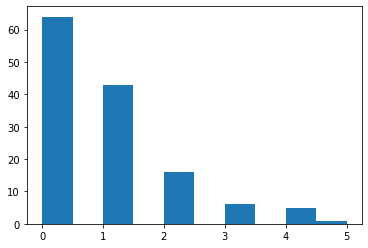

In [9]:
plt.hist(traffic['Broken Truck'])
plt.show()

### Task 3 - Histograms with pandas

1. Histograms can be created in pandas with `.plot.hist()`. Use the `.plot.hist()` method on the **Broken Truck** column to create a histogram of the column. Do you notice a difference in the plot?
2. Since pandas plots are created by running matplotlib code in the background, you are able to modify them using the matplotlib functions that you have used in the previous sessions. 
Set the plot title to `'Broken Truck'`.
3. You can also customize the plot by passing parameters to the `.plot.hist()` function. Change the title by passing the string `'Broken Truck'` to the `title` parameter inside the `.plot.hist()` function.
4. Use the `plt.show` function to suppress the output from the plot.

### Histogram matrix

Another very useful pandas method to create histograms of all the columns in the dataset is the `hist()` method which you can directly run from the dataframe itself. Notice that the `hist()` method does not have to be preceded with `.plot` as for the `plot.bar()` method for instance.

With the `figsize` parameter we can change the size of the plot by passing a list. The first number sets the width, the second the height of the plot.

In [11]:
traffic.hist(figsize=[10, 7])
plt.show()

### Task 4 - Histogram matrix

1. Create a histogram matrix for the whole dataframe using the `hist()` method.
2. Set the figure size to (12, 8).
3. Use the `bins` parameter to set the bins to 20
4. Use the `plt.tight_layout()` function before the `plt.show()` function to prevent the different histograms from overlapping.

## Plotting with seaborn

Seaborn is a separate library that is build on top of matplotlib, which means that when running a seaborn function in the background it runs matplotlib functions. Below are the main advantages of using seaborn:
- It requires less customization to create nice looking plots. The default plots already look really good and you can choose from a set of themes that all create aesthetically pleasing plots.
- The syntax is easier to learn and use. The functions work similar to how plotting functions work in R, where you can select columns using their name only. Some plots as for instance bar plots and especially grouped/stacked bar plots are much easier to create
- There are a several very useful plot types that are directly available in seaborn that in matplotlib require more complex code to generate. Noteable examples are the heatmap, scatter plot with line of best fit, violin plots and density plots.

As with pandas, you occassionally have to resort to usign matplotlib functions to apply certain customizations.

### Heatmap

A heatmap is a 2D array like data visualization where the magnitude of the values being represented is coded by the hue or intensity of the colors. 

Heatmaps are a useful tool to visualize the correlation matrix of the variables in a dataset.







Below we use some randomly created dataset **df** and use the `.corr()` method to create the correlation table, which displays the correlation between all variables in the dataset.

<br>

```python
df.corr()
```
<img src="https://www.dropbox.com/s/xy26be4tjtiw44f/pd_corr.png?raw=1" width="600px">

In order to use the seaborn library, we import it first under the alias **sns**.

<br>

```python
import seaborn as sns
```


&nbsp;

To create the heatmap, we use the `sns.heatmap()` function and pass the correlation table. 

The heatmap function will map the columns to the x-axis and the rows to the y-axis. The colorbar on the side shows how the color represents the strength of the correlation between two variables. The yellow square indicates the correlation between variable F and variable B, which is roughly 0.60.

```python
sns.heatmap(df.corr())
```

<img src="https://www.dropbox.com/s/lsj1zwj5yru6ybg/heatmap2.png?raw=1" width="500px">


### Task 5 - Heatmap

1. Import the seaborn library under the alias sns.
2. Create a heatmap of the correlation table of the traffic dataset.

### line plots

Let us now explore how we can generate line plots with seaborn.

We use some fake data on train crowdedness throughout the week. The dataset has a column for the time, day of the week and train capacity.

&nbsp;

```python 
train_cap.head()
```

<img src="https://www.dropbox.com/s/ct4ngi4ynq9kzj0/train_head.png?raw=1" width="200px">


We plot train capacity as a function of time using the `sns.lineplot()` function. Since we pass the dataset with the `data` parameter, we can refer to the columns as strings with the `x` and `y` parameter.

&nbsp;

```python
sns.lineplot(x='times', y='cap', data=train_cap)
plt.show()
```

<img src="https://www.dropbox.com/s/unj4cvd9e31kurc/sns_lineplot.png?raw=1" width="400px">



You can add another layer to the line plot with the `hue` parameter, which will create lines for each level of a column. We pass the **day** column in order to draw colored lines for each value of the **day** column. The `lineplot()` function splits the dataset into subplots for each value from the **day** column and then plots a line for each day.

&nbsp;

```python
sns.lineplot(x='times', y='cap', data=train_cap)
plt.show()
```

<img src="https://www.dropbox.com/s/j7al2cmkdqb7wqh/sns_lineplot3a.png?raw=1" width="400px">




By default, seaborn uses the parameters used by matplotlib to configure the plots appearance. To make our plot look a bit nicer, we use the `sns.set_theme()` function to activate seaborn's default theme.

&nbsp;

```python
sns.set_theme()
sns.lineplot(x='times', y='cap', data=train_cap)
plt.show()
```


<img src="https://www.dropbox.com/s/vb56qlv8l807yaa/sns_lineplot3.png?raw=1" width="400px">




The legend shouldn't overlap with any plot elements. One simple way to fix this is to increase the size of the plot, which we can do with the `plt.subplots()` functions. The `figsize` paramter enables us to change the size of our plot by passing by passing a tuple with the width and height of the plot. We increase the size to 8 by 5 inches. 

&nbsp;

```python
plt.subplots(figsize=(8,5))
sns.lineplot(x='times', y='cap', data=train_cap)
plt.show()
```

<img src="https://www.dropbox.com/s/r9ye5zbj2om30ry/sns_lineplot4.png?raw=1" width="500px">

### Task 6 - Line plots

1. Create a line of the traffic data. Plot the hours on the x-axis and the slowness of traffic on the y-axis.
2. Rotate the xticks.
3. Create a second plot that plots the hours on the x-axis, the slowness of traffic on the y-axis and plots a line for each day in a different colour.
4. Rotate the xticks.
5. Increase the size of the plot to 8*5 inches.
6. Update the xticks to only display the full hours.

<div class="alert alert-block alert-info" style="background-color:#ECECEB; color:#3F3F3F; width:90%; padding:50px; -webkit-border-radius:5px">

### Final task: Please give us your feedback!

Upon completing the survey, **you will receive the link to the solution file**, to check how your code compares to the sample solution.

In order to adapt our training to your needs and provide the most valuable learning experience for you, we depend on your feedack.

We would be grateful if you could take **1 min** before the end of the workshop to get your feedback! 

<a href="https://lse.eu.qualtrics.com/jfe/form/SV_6eSrOVWuit28qcS?coursename=Python Data Visualization 3: Plotting with Pandas and Seaborn  &topic=Python&link=https://lsecloud-my.sharepoint.com/:u:/g/personal/m_wiemers_lse_ac_uk/EeNsIY2Nk1BBpBzsJGuoF1YB2cLw8iU0RXpnnIrUFJKwsQ?e=6XQEgD&prog=DS&version=23-24&link2="><b>Click here to open the survey!</b></a>


</div>

## Bonus task: Grouped Bar Plot with Seaborn

In the previous workshop you've learned how to create a grouped bar plot with matplotlib. Filtering the data and setting up the positions for the labels and bars can be cumbersome and it gets more complicated the more groups your categorical variable has. A barplot that takes up to 20 lines with matplotlib can be created with one line using seaborn's barplot function.

We are going to use the titanic dataset, which you can access through seaborn, to practice with grouped bar plots.

In [24]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic.head()


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

The titanic dataset has data on the passengers from the tragic titanic voyage. We will create a barplot of the survival rates for each level of passenger class. 

The `sns.barplot()` function requires values for the `x`, `y` and `data` parameters. Since we pass a dataframe with the `data` parameter, we can select the columns to go to the x and y axis with the column name.

The plot shows the average survival rate, that is, the mean of the *survived* column for each level of the *pclass* column.

<AxesSubplot:xlabel='pclass', ylabel='survived'>

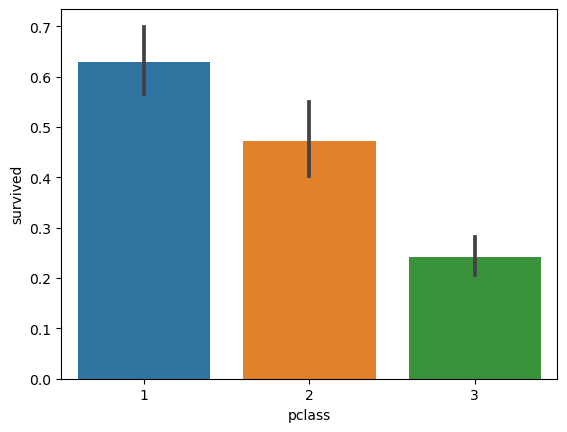

In [25]:
sns.barplot(x='pclass', y='survived', data=titanic)

We can use the `hue` parameter, to add a colour layer to the plot for the `sex` column. This createas a grouped bar plot that shows survival rates as a function of passenger class and sex.

<AxesSubplot:xlabel='pclass', ylabel='survived'>

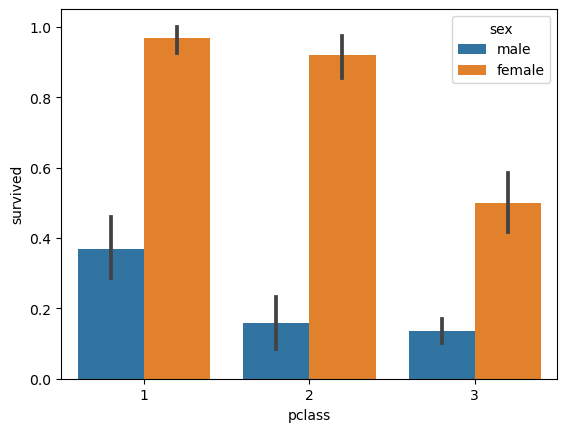

In [26]:
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic)

We can change the alpha value of the colours and remove the bars for the confidence interval.

<AxesSubplot:xlabel='pclass', ylabel='survived'>

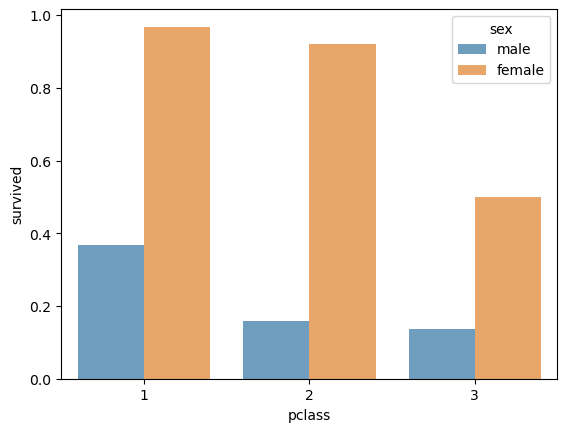

In [31]:
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic, alpha=.7, errorbar=None)

We can also adjust the range of the confidence interval and change the size of the cap.

Based on the confidence intervals, we can infer that the survival rate is significantly increased for male passengers from class 1 compared to classes 2 and 3. For female passengers there only seems to be a difference for class 3 compared to class 1 and 2.

In [30]:
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic, alpha=.7, errorbar='ci', capsize=.1)

<AxesSubplot:xlabel='pclass', ylabel='survived'>

Now it is your turn to create a grouped bar plot for the effect of being alone on board, as indicated by the `alone` column, and the sex of a passenger on the survival rate.

How would you describe the effect of sex and either being alone or not on board on the survival rate?